In [97]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import lib_data_load as ld
import lib_data_ref as dr
from datetime import date

import seaborn as sns

dir_data = ".\\data\\data_gouv_fr\\"
start_year = 2005
end_year = 2021

# Usagers
dic_usagers = ld.load_usagers(folder_path=dir_data, start_year=start_year, end_year=end_year)
# Caractéristiques
dic_caract = ld.load_caract(folder_path=dir_data, start_year=start_year, end_year=end_year)
# Véhicules
dic_vehic = ld.load_vehicules(folder_path=dir_data, start_year=start_year, end_year=end_year)
# Lieux
dic_lieux = ld.load_lieux(folder_path=dir_data, start_year=start_year, end_year=end_year)

# df_usagers = dic_usagers[start_year]
# for year in range(start_year, end_year+1):
#     df_usagers = pd.concat([df_usagers, dic_usagers[year]], axis=0)

# df_usagers = pd.concat([dic_usagers[2019], dic_usagers[2020]], axis=0)
# df_caract = dic_caract[2020]
# df_vehic = dic_vehic[2020]
# df_lieux = dic_lieux[2020]

C:\Users\nicol\git\projet-accidents-routiers\lib_data_load.py:167: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2016] = pd.read_csv(folder_path + 'lieux_2016.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\lib_data_load.py:169: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2017] = pd.read_csv(folder_path + 'lieux-2017.csv', sep=',')
C:\Users\nicol\git\projet-accidents-routiers\lib_data_load.py:171: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lieux[2018] = pd.read_csv(folder_path + 'lieux-2018.csv', sep=',')


In [98]:
import math 

for year in range(2005, 2019):
    df_usr = dic_usagers[year]
    df_usr[df_usr['secu'] == np.nan]['secu1'] = [i//10 for i in df_usr[df_usr['secu'] == np.nan]]
#     df_usr['secu2'] = [i%10 for i in df_usr['secu']]
    

df_usr

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [65]:
dic_usagers[2009]['secu'].value_counts()

11.0    90960
21.0    31681
13.0    13562
93.0    12466
23.0     4010
12.0     2646
22.0     1812
31.0     1204
1.0       838
91.0      521
92.0      473
43.0      219
41.0      203
42.0      142
2.0        81
33.0       63
32.0       56
3.0        16
Name: secu, dtype: int64

In [57]:
# for key in dic_usagers:
#     print(f"{key} : ", dic_usagers[key].columns)
    
# for key in dic_vehic:
#     print(f"{key} : ", dic_vehic[key].columns)
    
print("2018: ", dic_vehic[2018].columns)
print("2019: ", dic_vehic[2019].columns)
    

2018:  Index(['Num_Acc', 'senc', 'catv', 'occutc', 'obs', 'obsm', 'choc', 'manv',
       'num_veh'],
      dtype='object')
2019:  Index(['Num_Acc', 'id_vehicule', 'num_veh', 'senc', 'catv', 'obs', 'obsm',
       'choc', 'manv', 'motor', 'occutc'],
      dtype='object')


In [53]:
df = dic_usagers[2021]
df.drop_duplicates(inplace=True)

dic_vehic



,Num_Acc,id_vehicule,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
4,202100000003,201 761,A01,1,1,1,1,1995.0,1,1,0,-1,0,0,-1
5,202100000003,201 761,A01,10,3,3,2,1959.0,4,0,-1,-1,3,3,1


###  Check for duplicated and remove them

In [2]:
print("Avant suppression des doublons : \n")
print(' - usagers en doublons : ', df_usagers.duplicated().sum())
print(' - caractéristiques en doublons :', df_caract.duplicated().sum())
print(' - véhicules en doubons :', df_vehic.duplicated().sum())
print(' - lieux en doublons : ', df_lieux.duplicated().sum())

df_usagers.drop_duplicates(inplace=True)
df_caract.drop_duplicates(inplace=True)
df_vehic.drop_duplicates(inplace=True)
df_lieux.drop_duplicates(inplace=True)

Avant suppression des doublons : 

 - usagers en doublons :  63
 - caractéristiques en doublons : 0
 - véhicules en doubons : 0
 - lieux en doublons :  0


### Merge data into one DataFrame

In [3]:
df = df_usagers.merge(on=['Num_Acc'], right=df_caract, how='left')
df = df.merge(on=['Num_Acc', 'id_vehicule', 'num_veh'], right=df_vehic, how='left')
df = df.merge(on='Num_Acc', right=df_lieux, how='left')

### Check null values

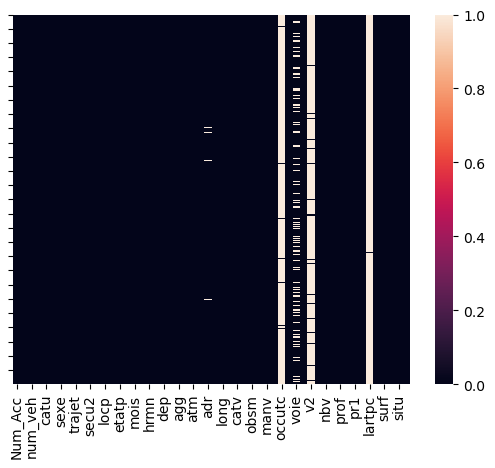

In [4]:
ax = sns.heatmap(df.isna())
ax.axes.yaxis.set_ticklabels('');



### Analyse intercorrelations between variables

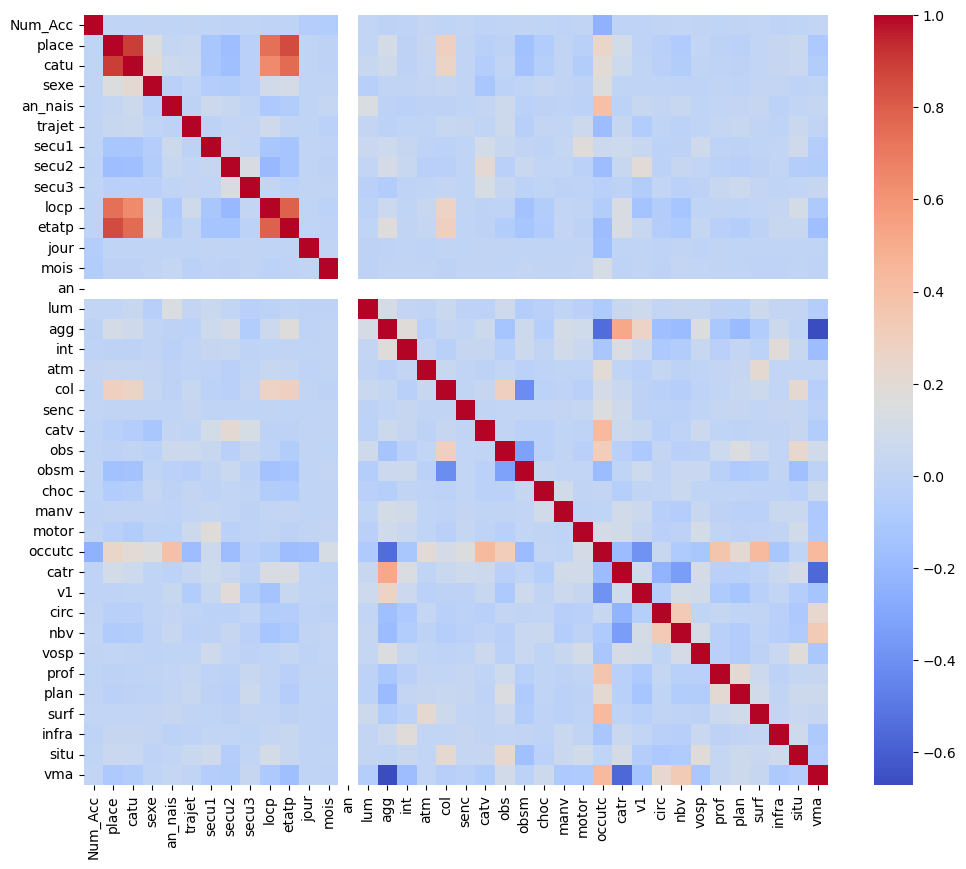

In [5]:
target = df['grav']
data = df.drop(columns=['grav'], axis=1)

corr = data.corr()

fig = plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=False, cmap='coolwarm');

In [6]:
# print('usagers : ', df_usagers.columns)
# print('caract : ', df_caract.columns)
# print('vehic : ', df_vehic.columns)
# print('lieux : ', df_lieux.columns)
# df_all.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105232 entries, 0 to 105231
Data columns (total 54 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      105232 non-null  int64  
 1   id_vehicule  105232 non-null  object 
 2   num_veh      105232 non-null  object 
 3   place        105232 non-null  int64  
 4   catu         105232 non-null  int64  
 5   grav         105232 non-null  int64  
 6   sexe         105232 non-null  int64  
 7   an_nais      105232 non-null  int64  
 8   trajet       105232 non-null  int64  
 9   secu1        105232 non-null  int64  
 10  secu2        105232 non-null  int64  
 11  secu3        105232 non-null  int64  
 12  locp         105232 non-null  int64  
 13  actp         105232 non-null  object 
 14  etatp        105232 non-null  int64  
 15  jour         105232 non-null  int64  
 16  mois         105232 non-null  int64  
 17  an           105232 non-null  int64  
 18  hrmn         105232 non-